In [1]:
#use:
#plot output for sample
#
#
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def get_hist_yr(histfile):
    """
    get the first year of history file
    """
    index = histfile.find('h0.')
    substring_after_h0 = histfile[index + len('h0.'):]    
    year=int(substring_after_h0[:4])
    return year

def is_leap_year(year):
    if (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0):
        return 1
    else:
        return 0

def get_ts_nyears(ts):
    return int(len(ts)/365)
    
def cumts2ts(cts,year0):
    """
    convert cumulative time series into difference
    """
    nyears=get_ts_nyears(cts)
    print('nyears=%d'%nyears)
    ts=np.zeros((nyears*366,1))
    id0=0
    id1=365
    nmels=len(cts)
    for yr in range(nyears):
        year=yr+year0
        print('year=%d'%year)
        leap=is_leap_year(year)
        id1=min(id1+leap,nmels)        
        ts[id0+1:id1]=cts[id0+1:id1]-cts[id0:id1-1]
        id0=id1
        id1=id1+365
    return ts


In [3]:
ncfile='../dryland/dryland_maize.ecosim.h0.2001-01-02-00000.nc'

year0=get_hist_yr(ncfile)
# Open the NetCDF file
nc_file = nc.Dataset(ncfile, 'r')
print('year0=%d'%year0)
print("\nVariables:")
for var_name in nc_file.variables:
    print(var_name)

year0=2001

Variables:
ABV_GRD_RESP
ACTV_LYR
AIR_TEMP
AMENDED_C
AMENDED_N
AMENDED_P
ATM_CH4
ATM_CO2
AUTO_RESP
BLYR_RSC_CO2
BLYR_RSC_H2O
BRANCH_NO
CAN_CO2
CAN_CO2_FLX
CAN_G
CAN_GPP
CAN_H
CAN_HT
CAN_LE
CAN_RA
CAN_RN
CAN_TEMP
CH4_FLX
CH4_vr
CO2_FLX
CO2_LITR
CO2_vr
C_PARTS_brch_01
C_PARTS_brch_02
C_PARTS_brch_03
C_PARTS_brch_04
C_PARTS_brch_05
C_PARTS_brch_06
C_PARTS_brch_07
C_PARTS_brch_08
C_PARTS_brch_09
C_PARTS_brch_10
Canopy_PAR
DISCHG_FLX
DNS_RT_vr
ECND_vr
ECO_G
ECO_GPP
ECO_H
ECO_HVST_C
ECO_HVST_N
ECO_HVST_P
ECO_LAI
ECO_LE
ECO_NEE_CO2
ECO_NPP
ECO_RA
ECO_RH
ECO_Radnet
ET
EVAPN
EXUD_C_FLX
EXUD_N_FLX
EXUD_P_FLX
FIREp_CH4_FLX
FIREp_CO2_FLX
FIREp_N_FLX
FIREp_P_FLX
GRAIN_C
GRAIN_N
GRAIN_NO
GRAIN_P
Growth_Stage
HMAX_AIR
HMIN_AIR
HUM
HUMUS_C
HUMUS_N
HUMUS_P
HUSK_C
HUSK_N
HUSK_P
HVST_C_FLX
HVST_N_FLX
HVST_P_FLX
HeatFlx2G_col
LAI
LAIb
LEAF_C
LEAF_N
LEAF_NC
LEAF_NODE_NO
LEAF_P
LEAF_PC
LITRf_C
LITRf_N_FLX
LITRf_P_FLX
MIN_LWP
N2O_LITR
N2O_vr
N2_FIXN_FLX
NBP
NET_N_MIN
NET_P_MIN
NH3_LITR
NH3_vr
NH3c

nyears=3
year=2001
year=2002
year=2003


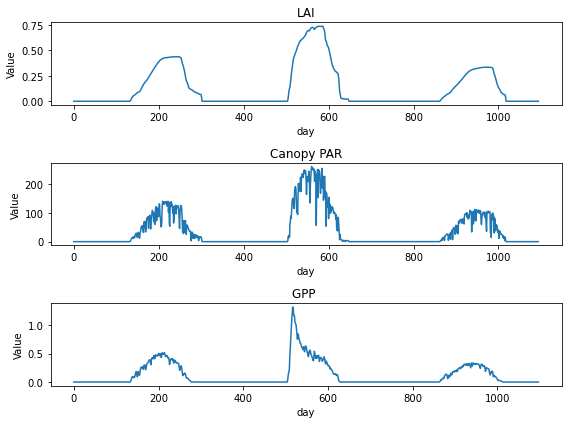

In [4]:
numbranch_pft=nc_file.variables['BRANCH_NO'][:]
maxbrach_pft=np.max(numbranch_pft,axis=0)
numlivepft=np.sum(maxbrach_pft>0)
LAI=nc_file.variables['LAI'][:]
parcan=nc_file.variables['Canopy_PAR'][:]
CanGPP=nc_file.variables['CAN_GPP'][:]

fig, axs = plt.subplots(3, 1, figsize=(8, 6))

axs[0].plot(LAI[:,0])
axs[0].set_xlabel('day')
axs[0].set_ylabel('Value')
axs[0].set_title('LAI')


axs[1].plot(parcan[:,0])
axs[1].set_xlabel('day')
axs[1].set_ylabel('Value')
axs[1].set_title('Canopy PAR')

cCanGPP=CanGPP[:,0].reshape(-1, 1)
tCanGPP=cumts2ts(cCanGPP,year0)

axs[2].plot(tCanGPP)
axs[2].set_xlabel('day')
axs[2].set_ylabel('Value')
axs[2].set_title('GPP ')

# Adjust layout
plt.tight_layout()

plt.show()